In [23]:
# Chargement des librairies

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd
plt.style.use('ggplot')

In [24]:
# Affichage des 10 premières lignes

df = pd.read_csv('./dataSetResult/dataset-after-scala-traitement.csv')
df.head(10)

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
0,Los Angeles,2020-01-01,65.0,34.0,52.7,2.2,38.5,33.5,33.0,5.0,0.0,1337.0
1,Beijing,2020-01-02,137.0,33.7,31.5,36.7,27.5,-1.6,32.0,4.0,2.0,1545.0
2,London,2020-01-03,266.0,43.0,59.6,30.4,57.3,36.4,25.0,10.0,1.0,1539.0
3,Mexico City,2020-01-04,293.0,33.7,37.9,12.3,42.7,-1.0,67.0,10.0,2.0,552.0
4,Delhi,2020-01-05,493.0,50.3,34.8,31.2,35.6,33.5,72.0,9.0,1.0,1631.0
5,Cairo,2020-01-06,28.0,67.2,44.9,41.9,47.8,7.9,89.0,11.0,2.0,1291.0
6,Los Angeles,2020-01-07,217.0,29.0,63.7,22.3,56.0,27.7,22.0,8.0,2.0,1852.0
7,Los Angeles,2020-01-08,449.0,60.8,56.2,40.0,18.1,26.3,46.0,14.0,2.0,350.0
8,Delhi,2020-01-09,342.0,44.9,63.4,31.0,34.9,28.0,34.0,7.0,2.0,878.0
9,Beijing,2020-01-10,279.0,27.1,101.0,47.8,42.2,-2.1,24.0,8.0,2.0,179.0


In [25]:
# Affichage des 10 dernières lignes

df = pd.read_csv('cleaned_v2.csv')
df.tail(10)

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
87106,Delhi,2019-03-31,301.0,38.1,18.8,31.3,38.7,33.6,81.0,10.0,Urban,676.0
87107,Delhi,2019-04-01,58.0,18.1,25.2,19.6,47.2,23.2,33.0,0.0,Urban,1481.0
87108,Los Angeles,2019-04-02,385.0,43.4,56.9,28.4,33.4,-1.9,73.0,10.0,Suburban,1859.0
87109,Tokyo,2019-04-03,381.0,34.6,16.5,23.3,46.7,16.3,92.0,0.0,Urban,1633.0
87110,London,2019-04-04,300.0,21.7,68.5,31.5,36.4,-0.8,73.0,5.0,Urban,665.0
87111,Tokyo,2019-04-06,22.0,23.4,53.4,24.3,58.9,9.1,55.0,5.0,Suburban,419.0
87112,Delhi,2019-04-07,170.0,48.0,32.4,25.0,15.7,5.6,40.0,10.0,Urban,695.0
87113,Delhi,2019-04-08,307.0,46.7,21.8,31.9,45.1,9.5,44.0,12.0,Urban,245.0
87114,Beijing,2019-04-09,65.0,31.9,26.0,38.1,53.0,17.8,46.0,11.0,Suburban,1291.0
87115,Mexico City,2019-04-10,59.0,41.8,50.1,31.2,52.0,25.0,65.0,8.0,Urban,983.0


In [26]:
# Trie le DataFrame par date croissante
df = df.sort_values(by='date', ascending=False)     
df.head(10)

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
2156,Mexico City,2025-12-31,454.0,54.3,23.9,40.4,54.4,18.7,67.0,9.0,Urban,1930.0
2155,Delhi,2025-12-30,420.0,54.5,33.6,45.0,21.2,30.2,92.0,12.0,Suburban,605.0
2154,Tokyo,2025-12-29,55.0,43.2,79.4,34.2,58.8,9.1,73.0,12.0,Suburban,778.0
2153,Delhi,2025-12-28,40.0,51.3,34.5,35.9,26.4,30.1,79.0,8.0,Urban,1814.0
2152,Mexico City,2025-12-27,223.0,38.4,43.3,36.1,46.2,9.2,93.0,9.0,Urban,1959.0
2151,London,2025-12-26,117.0,38.2,97.2,12.9,42.8,23.1,82.0,10.0,Rural,346.0
2150,Delhi,2025-12-25,362.0,35.3,59.7,49.7,29.2,-1.3,47.0,9.0,Urban,1214.0
2149,Beijing,2025-12-24,351.0,14.4,45.1,38.1,52.1,20.6,39.0,8.0,Urban,1641.0
2148,Delhi,2025-12-23,190.0,25.7,86.2,25.3,48.5,19.0,65.0,12.0,Urban,1532.0
2147,London,2025-12-22,420.0,46.3,28.3,33.2,38.8,22.8,26.0,10.0,Urban,203.0


In [27]:
# Résumé du DataFrame : nombre de lignes, colonnes, types de données et nombre de valeurs non nulles
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87116 entries, 2156 to 86363
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 87116 non-null  object 
 1   date                 87060 non-null  object 
 2   aqi                  87116 non-null  float64
 3   pm2_5                87116 non-null  float64
 4   pm10                 87116 non-null  float64
 5   no2                  87116 non-null  float64
 6   o3                   87116 non-null  float64
 7   temperature          87116 non-null  float64
 8   humidity             87116 non-null  float64
 9   hospital_admissions  87116 non-null  float64
 10  population_density   87116 non-null  object 
 11  hospital_capacity    87116 non-null  float64
dtypes: float64(9), object(3)
memory usage: 8.6+ MB


In [28]:
df['date'] = pd.to_datetime(df['date'])            
# Crée une nouvelle colonne dans le DataFrame avec le nom du mois
df['Month_name'] = df['date'].dt.month_name()   
# Crée une nouvelle colonne dans le DataFrame avec le nom du jour
df['Day_name'] = df['date'].dt.day_name()      
# Trie les lignes par date croissante et affiche les 5 premières    
df.sort_values(by='date', ascending=True).head()   

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity,Month_name,Day_name
50329,Delhi,2019-01-01,241.0,45.8,40.7,21.2,50.9,23.4,82.0,10.0,Urban,1050.0,January,Tuesday
57903,Delhi,2019-01-01,448.0,34.2,32.1,38.4,24.7,25.8,45.0,6.0,Urban,1053.0,January,Tuesday
5041,Delhi,2019-01-01,327.0,39.9,19.5,35.4,44.3,4.5,47.0,10.0,Suburban,289.0,January,Tuesday
37389,Mexico City,2019-01-01,120.0,23.8,41.4,19.6,31.2,28.7,52.0,11.0,Urban,423.0,January,Tuesday
14396,Delhi,2019-01-01,156.0,60.9,76.6,21.0,49.5,24.4,61.0,13.0,Urban,1751.0,January,Tuesday


In [29]:
# Supprime temporairement la colonne 'date' et affiche des statistiques descriptives (moyenne, écart-type, min, max...) pour les colonnes numériques restantes
df.drop('date',axis=1).describe()

,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,hospital_capacity
count,87116.000000,87116.000000,87116.000000,87116.000000,87116.000000,87116.000000,87116.000000,87116.000000,87116.000000
mean,249.266530,34.933845,50.133521,30.006234,39.985386,17.521502,56.959123,7.891042,1024.606111
std,144.486935,14.682182,19.792612,9.964131,12.008705,12.962466,21.631001,3.517821,561.839213
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,20.000000,0.000000,50.000000
25%,124.000000,24.800000,36.600000,23.300000,31.900000,6.300000,38.000000,5.000000,540.000000
50%,249.000000,34.900000,50.100000,30.000000,40.000000,17.500000,57.000000,8.000000,1025.000000
75%,374.000000,44.900000,63.500000,36.700000,48.100000,28.700000,76.000000,10.000000,1511.000000
max,499.000000,108.700000,143.500000,71.400000,93.500000,40.000000,94.000000,16.000000,1999.000000


<Axes: title={'center': 'Table de corrélation'}>

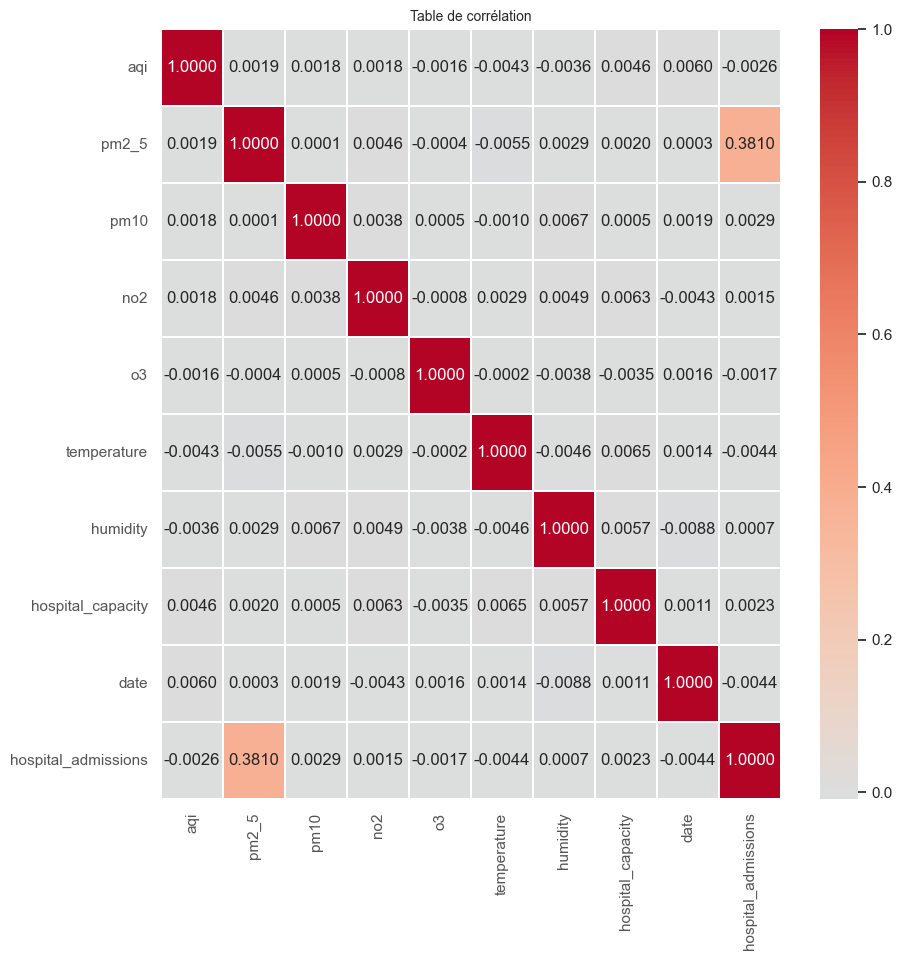

In [30]:
plt.figure(figsize=(10, 10)) 

plt.title("Table de corrélation", fontsize=10)

# Sélection des colonnes à inclure dans la corrélation
df_corr = df[['aqi', 'pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity', 'hospital_capacity', 'date', 'hospital_admissions']]

table_corr = df_corr.corr()

sns.set_theme(style="darkgrid", font_scale=1)
plt.xlabel("",fontsize=2)
plt.ylabel("",fontsize=2)

sns.heatmap(table_corr, 
            cmap='coolwarm',
            center=0,             
            linewidths=0.1,
            annot=True,
            fmt=".4f"
)


In [31]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'browser'

# Liste des colonnes à analyser : polluants et données météo
columns_to_analyze = ['pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity']

fig = go.Figure()

# Ajoute un histogramme pour chaque colonne de données
for column in columns_to_analyze:
    fig.add_trace(go.Histogram(
        x=df[column],
        name=column,
        opacity=0.75,
        histnorm='density',
        marker=dict(line=dict(width=0.5)),
    ))

fig.update_layout(
    title='Distribution des polluants et des données météorologiques',
    xaxis_title='Value',
    yaxis_title='Density',
    barmode='overlay',
    bargap=0.1,
    template='plotly_white'
)

In [32]:
colors = [
    'rgb(31, 119, 180)',
    'rgb(255, 127, 14)',
    'rgb(44, 160, 44)',
    'rgb(214, 39, 40)',
    'rgb(148, 103, 189)',
    'rgb(140, 86, 75)',
    'rgb(227, 119, 194)',
    'rgb(127, 127, 127)',
    'rgb(188, 189, 34)']
fig = go.Figure()

for i, column in enumerate(columns_to_analyze):
    fig.add_trace(go.Box(
        y=df[column],
        name=column,
        boxmean=True,
        marker=dict(color=colors[i], line=dict(width=1)),
        fillcolor=colors[i],
        line_color='rgb(8,48,107)'
    ))

fig.update_layout(
    title='Box Plots des Polluants et des Données Météorologiques', 
    yaxis_title='Value',
    template='plotly_white',
    font=dict(size=15),
    title_font=dict(size=20, family='Arial'),
    plot_bgcolor='rgb(240,240,240)',
    paper_bgcolor='rgb(255,255,255)',
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

In [33]:
# Distribution des villes dans le dataframe

pie_data = df['city'].value_counts().reset_index()
pie_data.columns = ['city', 'Count']

fig = sp.make_subplots(rows=1, cols=1, specs=[[{'type':'pie'}]])

fig.add_trace(go.Pie(
    labels=pie_data['city'],
    values=pie_data['Count'],
    name='City Distribution',
    textinfo='label+percent',
    hole=0.3
))

fig.update_layout(
    title_text='Distribution des villes dans le dataframe',
    template='plotly_white',
    height=600,
    width=600
)
fig.show()

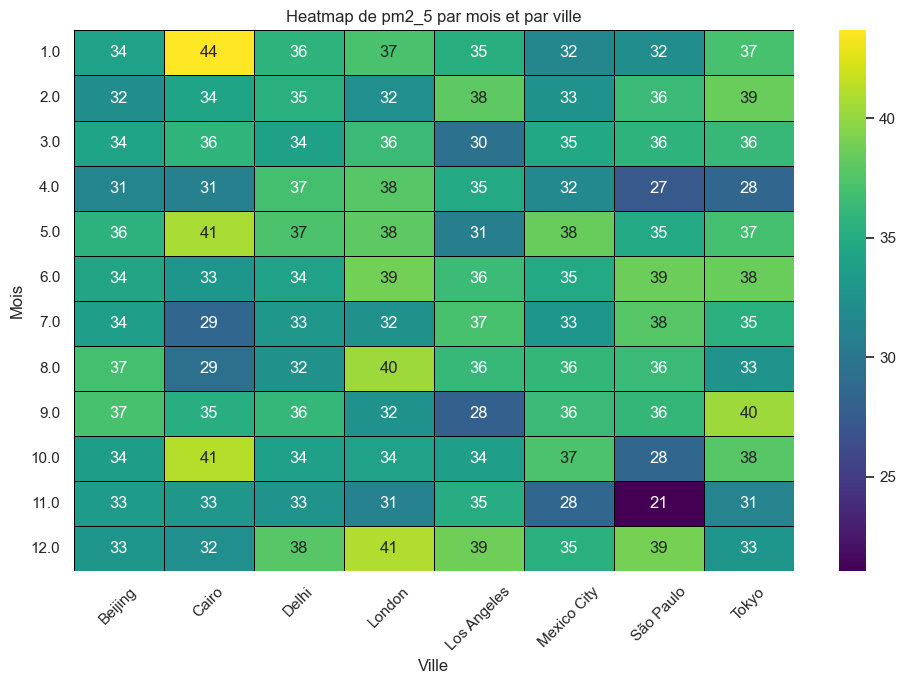

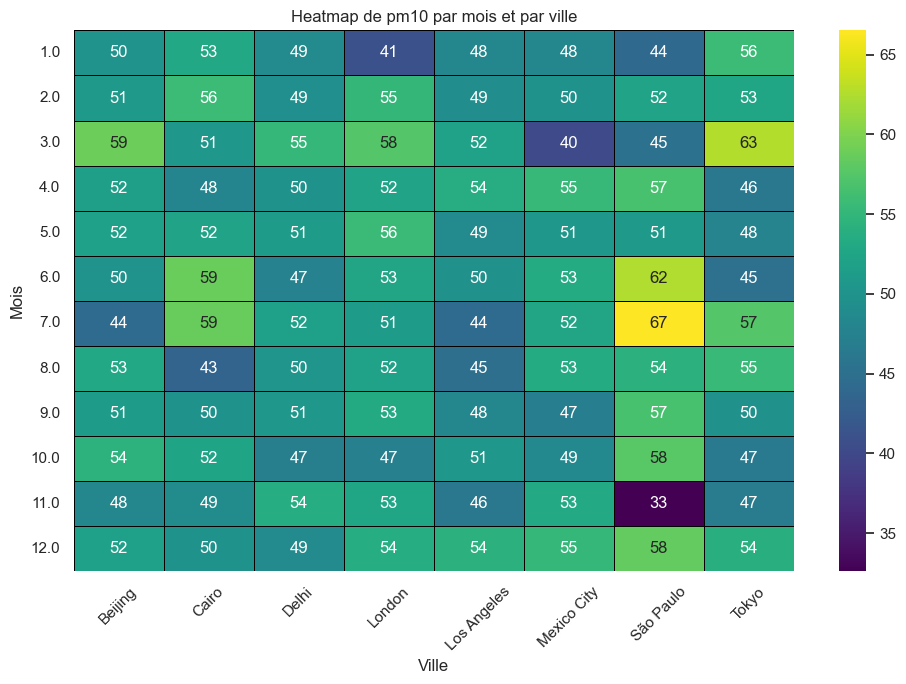

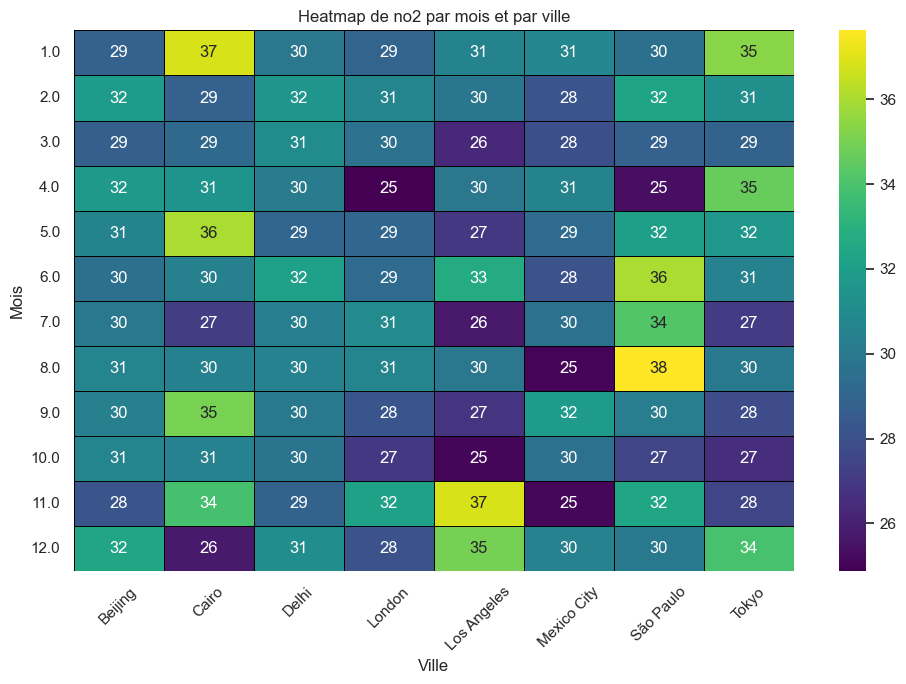

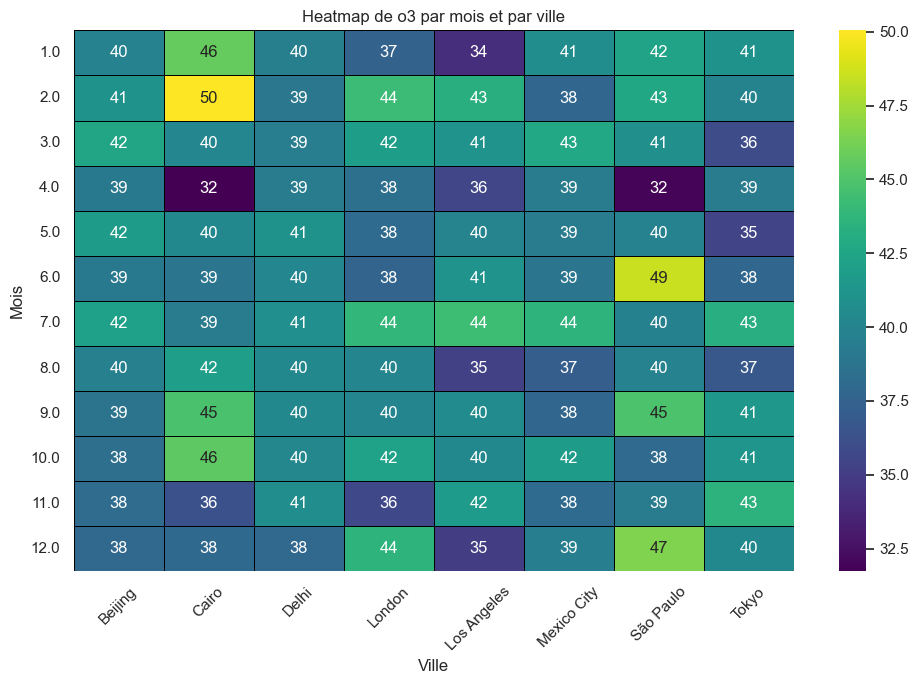

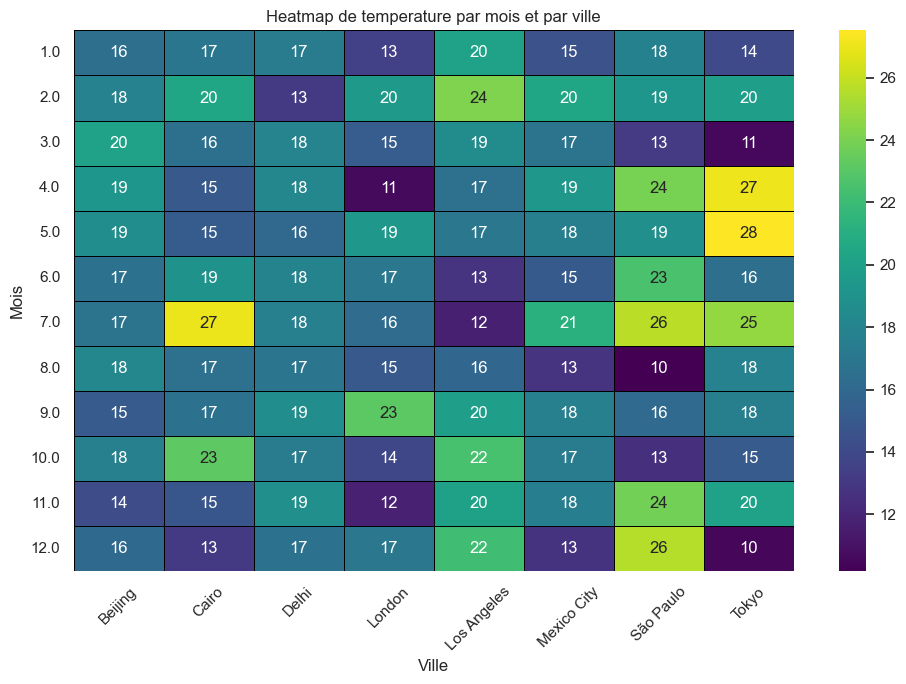

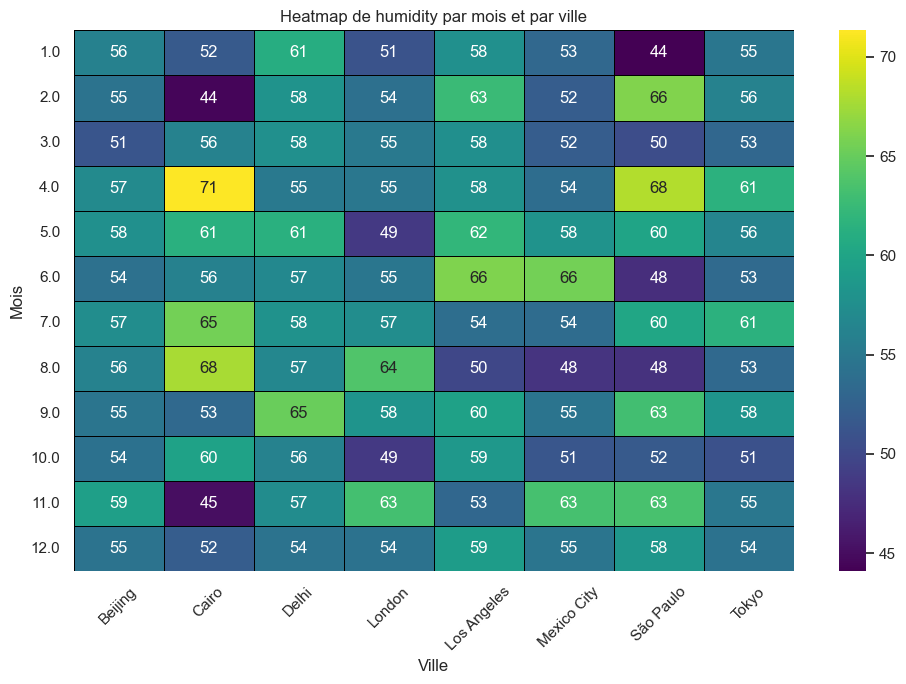

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extraction des années et mois
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

# Agrégation par mois et ville
monthly_city_summary = df.groupby(['Year', 'Month', 'city']).agg({
    'pm2_5': 'mean',
    'pm10': 'mean',
    'no2': 'mean',
    'o3': 'mean',
    'temperature': 'mean',
    'humidity': 'mean',
    'aqi': 'mean',
    'hospital_admissions': 'mean',
    'hospital_capacity': 'mean'
}).reset_index()

# Tri
monthly_city_summary.sort_values(by=['city', 'Year', 'Month'], inplace=True)

# Calculer des variations pour chaque moi
change_columns = ['pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity', 'aqi', 'hospital_admissions', 'hospital_capacity']
for col in change_columns:
    monthly_city_summary[f'{col}_Change'] = monthly_city_summary.groupby('city')[col].diff()


columns_to_analyze = ['pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity']

for column in columns_to_analyze:
    plt.figure(figsize=(10, 7))

    heatmap_data = monthly_city_summary.pivot_table(
        index='Month',
        columns='city',
        values=column,
        aggfunc='mean'
    )

    # Afficher la heatmap
    sns.heatmap(
        heatmap_data,
        cmap='viridis',  
        linewidths=0.5,
        linecolor='black',
        annot=True,       
    )

    plt.title(f'Heatmap de {column} par mois et par ville')
    plt.xlabel('Ville')
    plt.ylabel('Mois')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


18:09:18 - cmdstanpy - INFO - Chain [1] start processing
18:09:23 - cmdstanpy - INFO - Chain [1] done processing


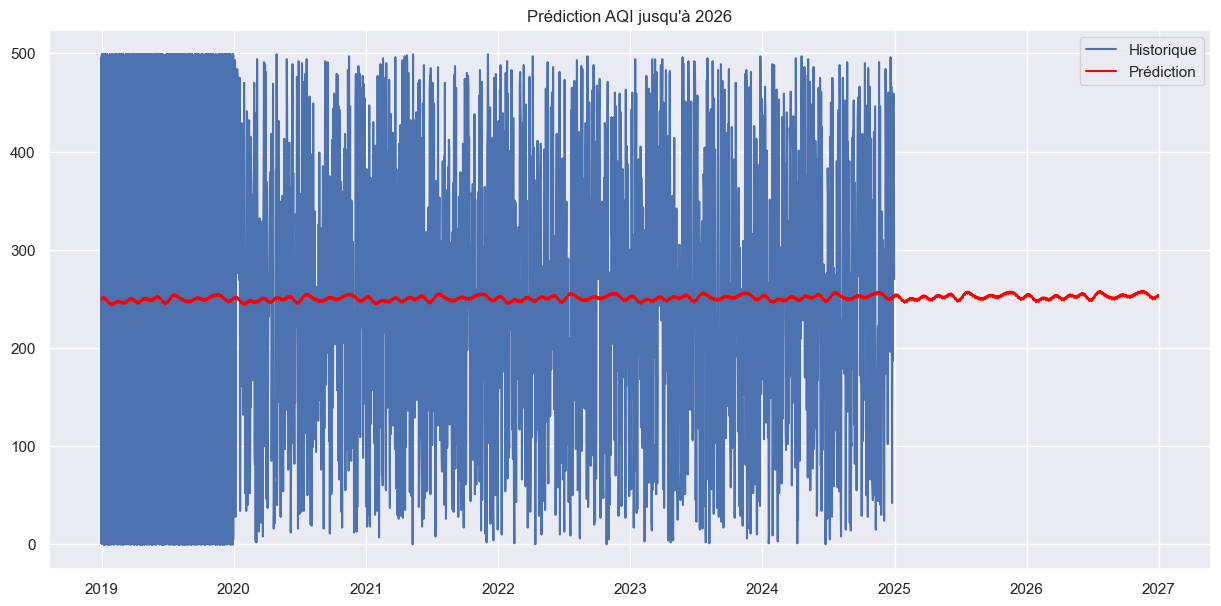

In [35]:
from prophet import Prophet

# Données jusqu'à 2024
df['date'] = pd.to_datetime(df['date'])
train_df = df[df['date'].dt.year <= 2024].copy()

# Préparation pour Prophet
prophet_df = train_df[['date', 'aqi']].rename(columns={
    'date': 'ds',
    'aqi': 'y'
})

# Modèle avec paramètres optimisés
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05
)
model.fit(prophet_df)

# Prédiction pour 2025 ET 2026 (730 jours)
future_dates = model.make_future_dataframe(periods=730)
forecast = model.predict(future_dates)

# Visualisation
plt.figure(figsize=(15, 7))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Historique')
plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Prédiction')
plt.title('Prédiction AQI jusqu\'à 2026')
plt.legend()
plt.show()

Formule : hospital_admissions ≈ 0.091 * pm2_5 + 4.696
R² : 0.141
MSE : 10.748


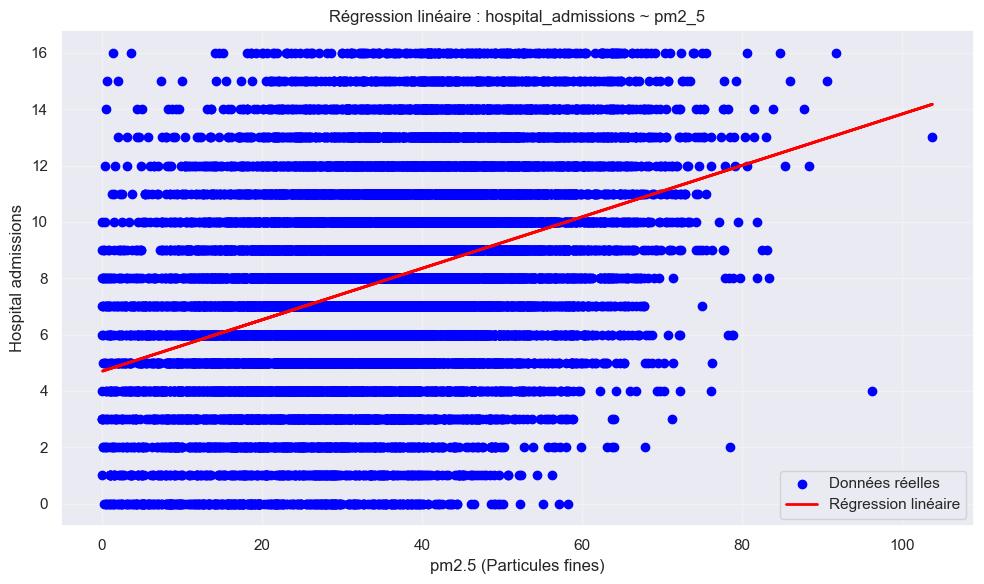

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# 3. Modèle de régression linéaire simple
X = df[['pm2_5']].dropna()
y = df.loc[X.index, 'hospital_admissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 4. Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef = model.coef_[0]
intercept = model.intercept_

print(f"Formule : hospital_admissions ≈ {coef:.3f} * pm2_5 + {intercept:.3f}")
print(f"R² : {r2:.3f}")
print(f"MSE : {mse:.3f}")

# 5. Affichage de la droite de régression
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Régression linéaire')
plt.title('Régression linéaire : hospital_admissions ~ pm2_5')
plt.xlabel('pm2.5 (Particules fines)')
plt.ylabel('Hospital admissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()